# import libraries

In [ ]:
import pandas as pd # pandas library used for data manipulation and wrangling
import numpy as np # numpy used for numarical computaion
import matplotlib.pyplot as plt # matplot used for visulization
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# sklearn libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
 # ML algorithms
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# metrics for model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



# Load data

In [ ]:
df=pd.read_csv("/content/Heart_Disease_Prediction.csv")

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.shape

(270, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 270 entries, 0 to 269

Data columns (total 14 columns):

 #   Column                   Non-Null Count  Dtype  

---  ------                   --------------  -----  

 0   Age                      270 non-null    int64  

 1   Sex                      270 non-null    int64  

 2   Chest pain type          270 non-null    int64  

 3   BP                       270 non-null    int64  

 4   Cholesterol              270 non-null    int64  

 5   FBS over 120             270 non-null    int64  

 6   EKG results              270 non-null    int64  

 7   Max HR                   270 non-null    int64  

 8   Exercise angina          270 non-null    int64  

 9   ST depression            270 non-null    float64

 10  Slope of ST              270 non-null    int64  

 11  Number of vessels fluro  270 non-null    int64  

 12  Thallium                 270 non-null    int64  

 13  Heart Disease            270 non-null    object 

dtypes: floa

# Fature engineering

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
Age,0.0
Sex,0.0
Chest pain type,0.0
BP,0.0
Cholesterol,0.0
FBS over 120,0.0
EKG results,0.0
Max HR,0.0
Exercise angina,0.0
ST depression,0.0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head(3)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence


In [ ]:
df['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

In [ ]:
df['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


In [ ]:
label=LabelEncoder()
df['Heart Disease']=label.fit_transform(df['Heart Disease'])

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


# EDA

In [ ]:
df.describe() # using this methed we check the distribution of numarical data and aslo chek mean,max,missing,and outliers

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


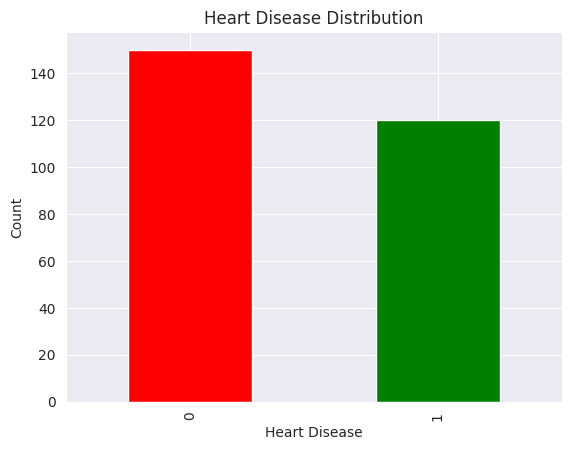

In [ ]:
df['Heart Disease'].value_counts().plot(kind='bar', title='Heart Disease Distribution', color=['red', 'green']) # Check the distribution of absence and presence of heart rete
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='count'>

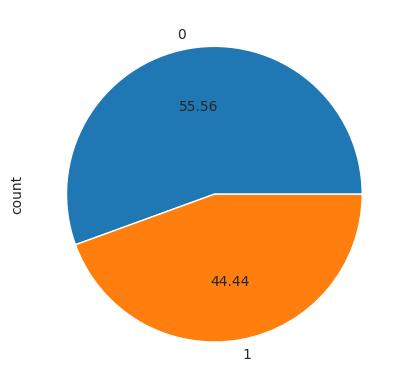

In [ ]:
df['Heart Disease'].value_counts().plot(kind='pie',autopct='%.2f') # check percentage using pie plot

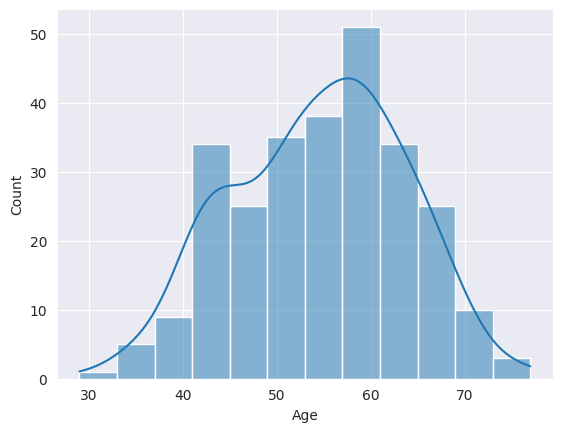

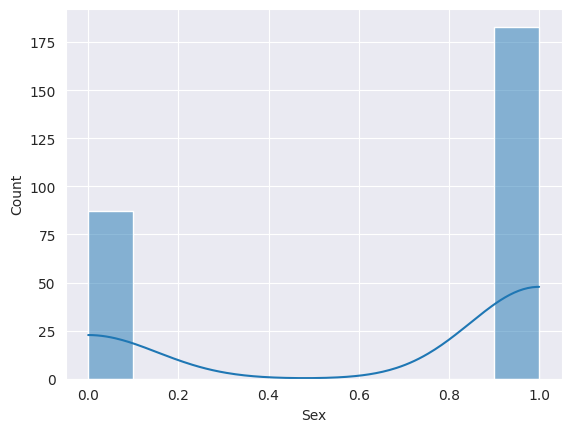

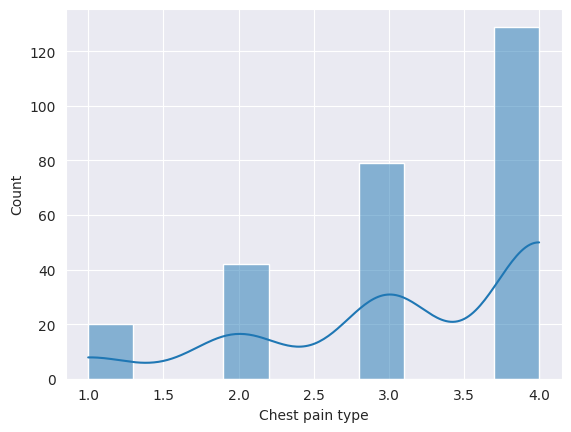

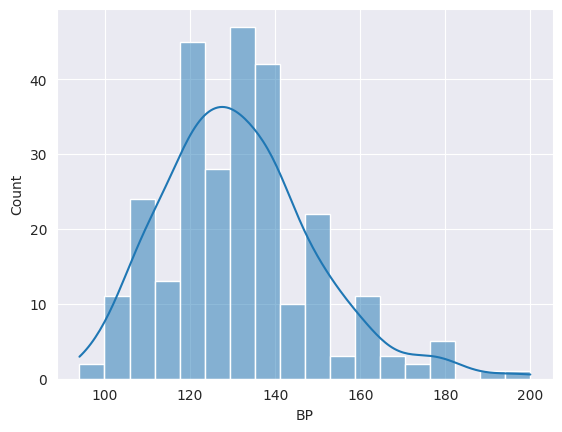

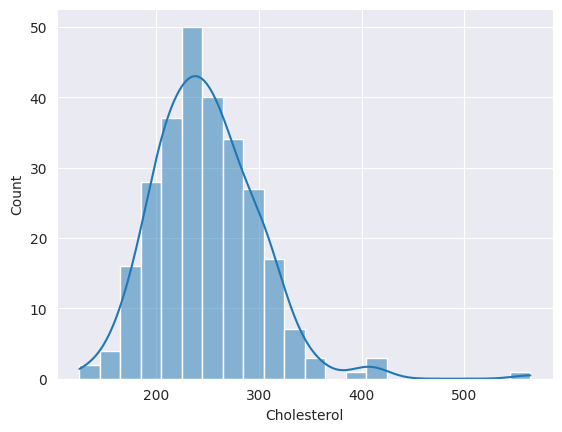

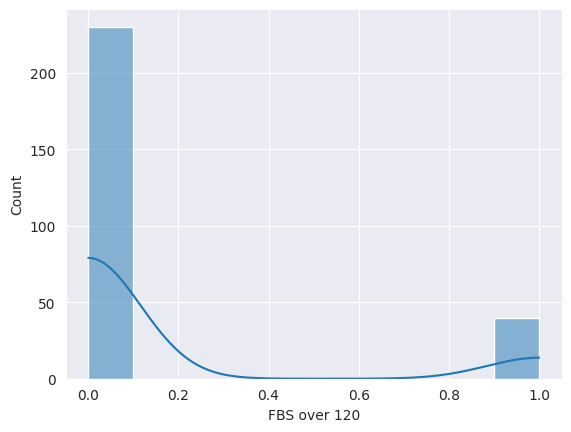

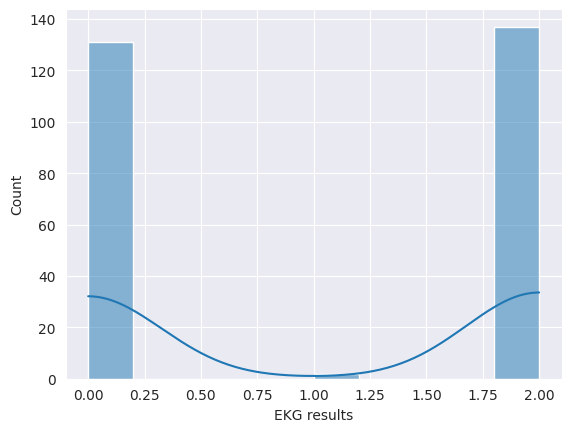

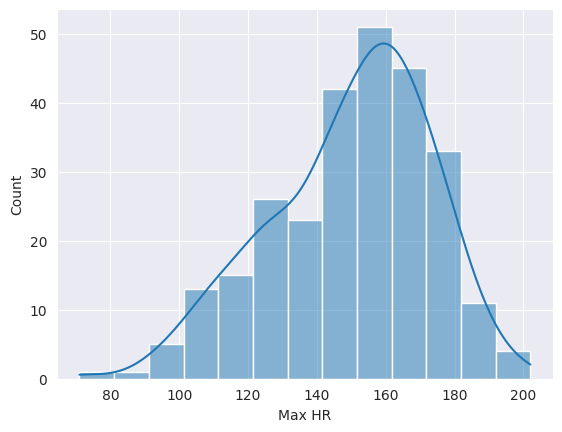

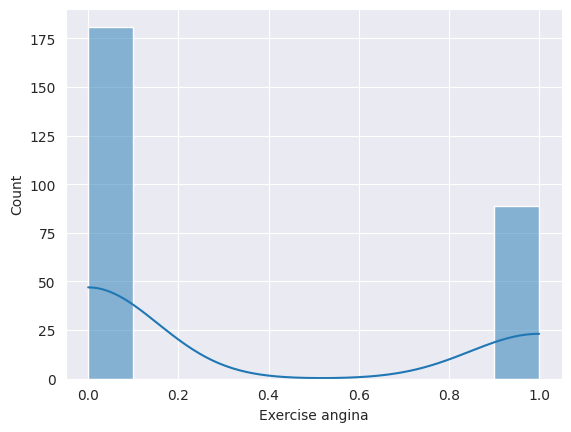

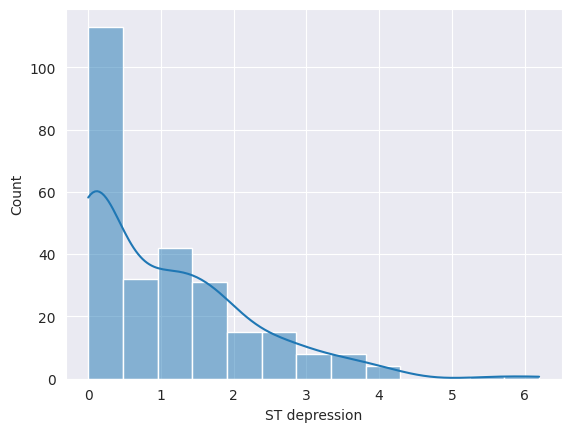

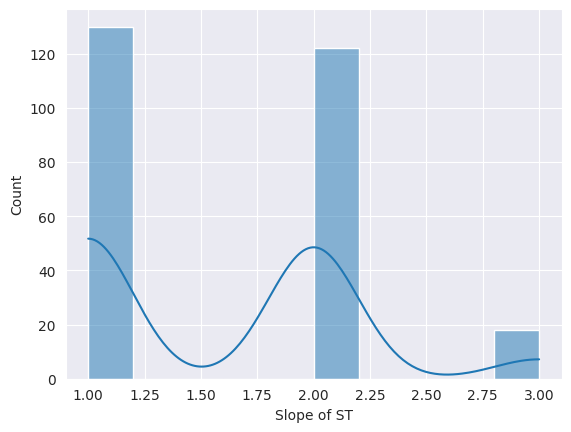

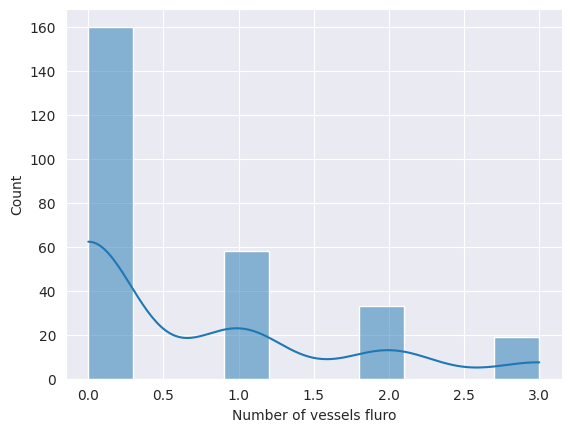

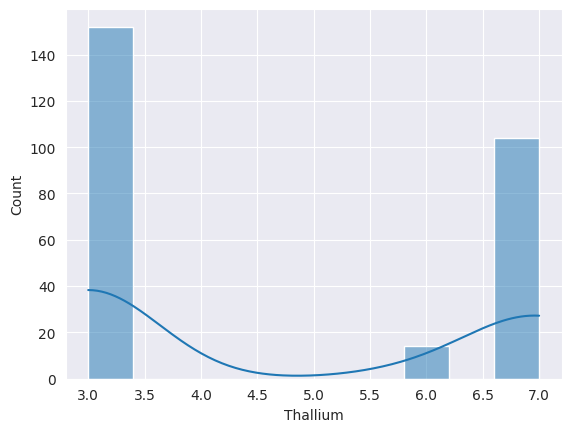

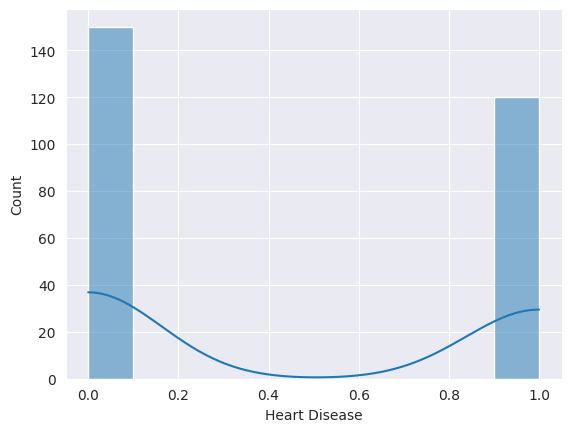

In [ ]:
for i in df.select_dtypes(include='number').columns: # check the distribution using seaborn library histplot
  sns.histplot(df[i],kde=True)
  plt.show()

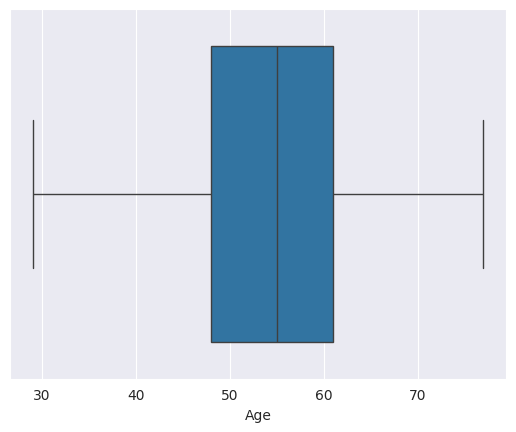

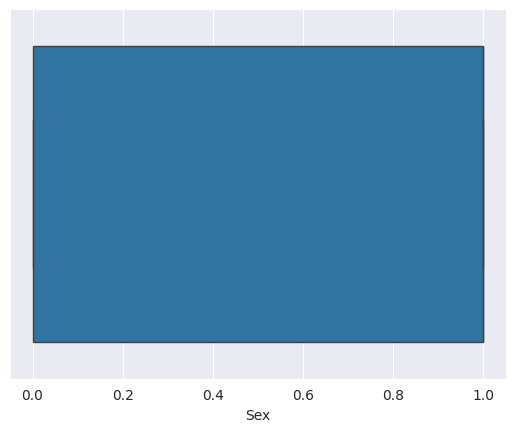

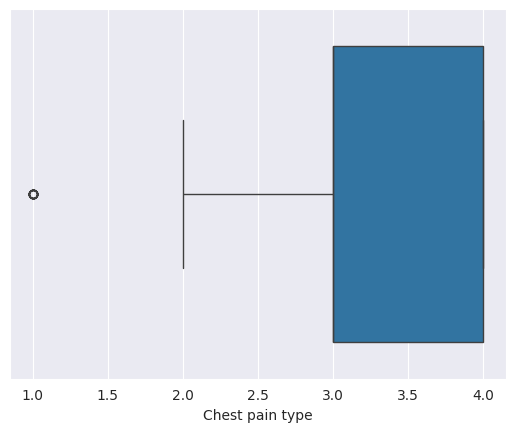

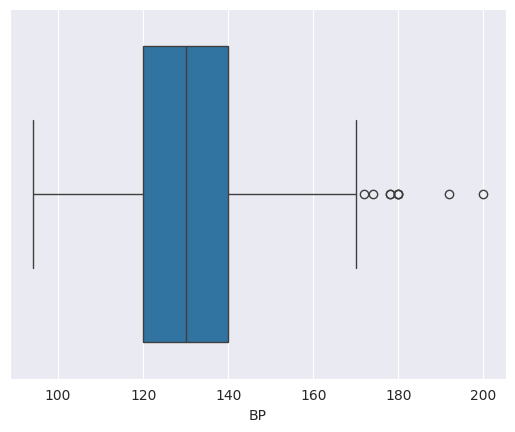

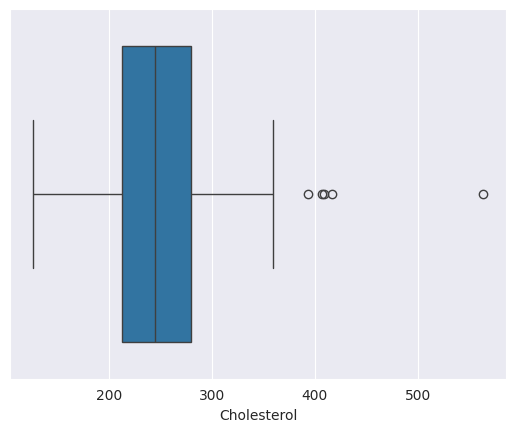

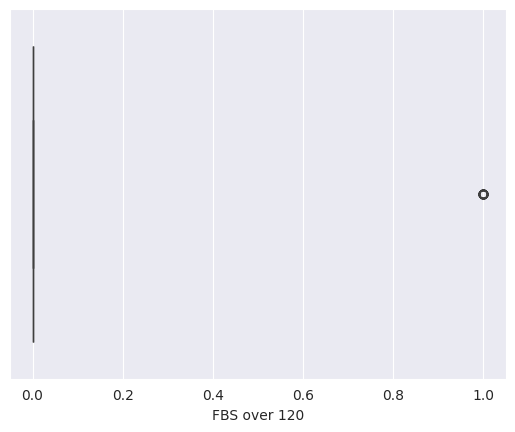

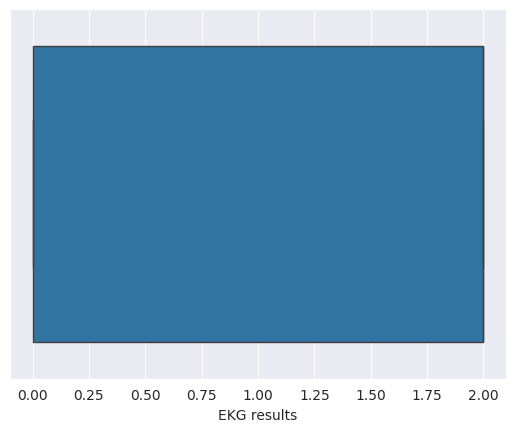

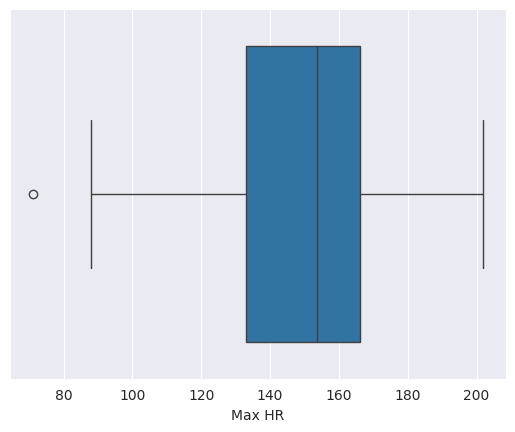

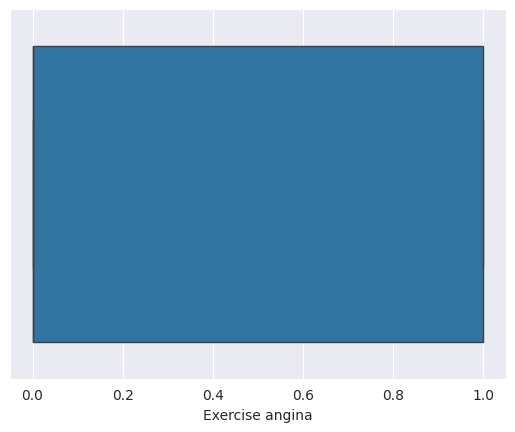

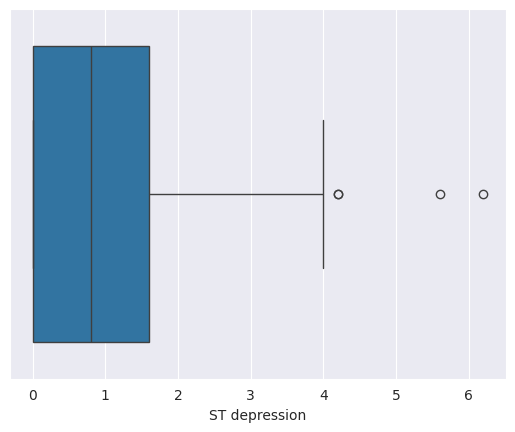

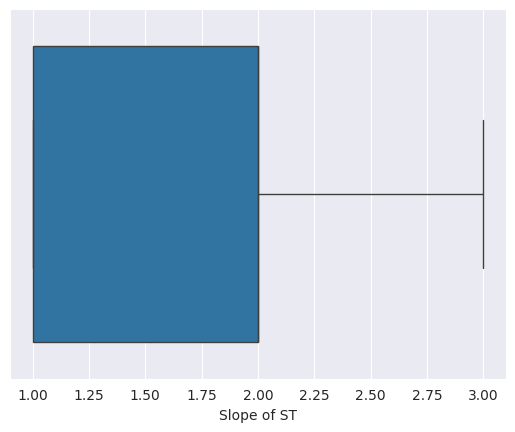

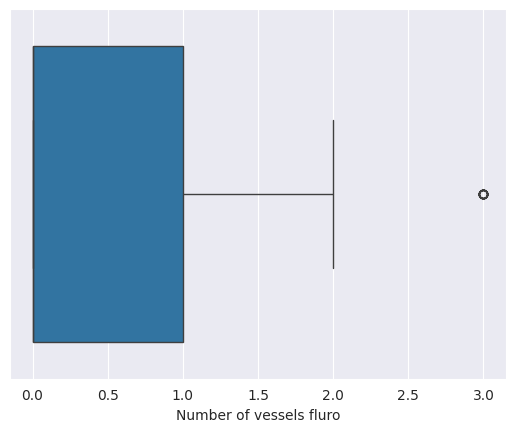

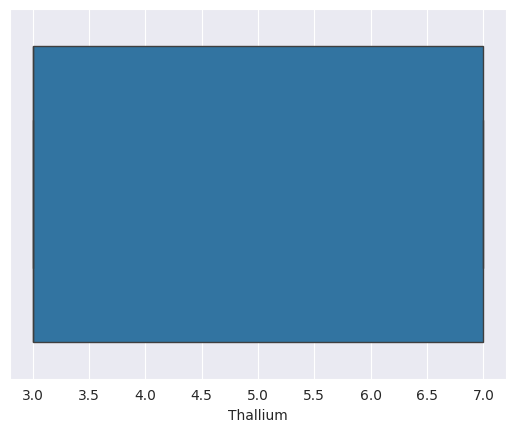

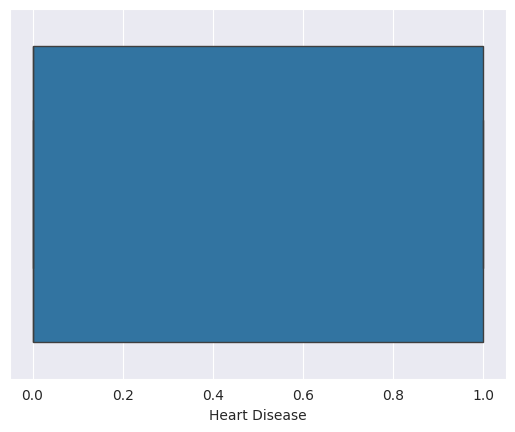

In [ ]:
for i in df.select_dtypes(include='number').columns: # check outliers using boxplot
  sns.set_style('darkgrid')
  sns.boxplot(data=df,x=i)
  plt.show()

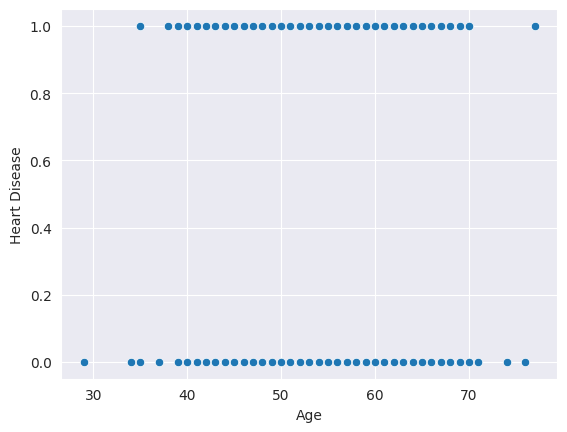

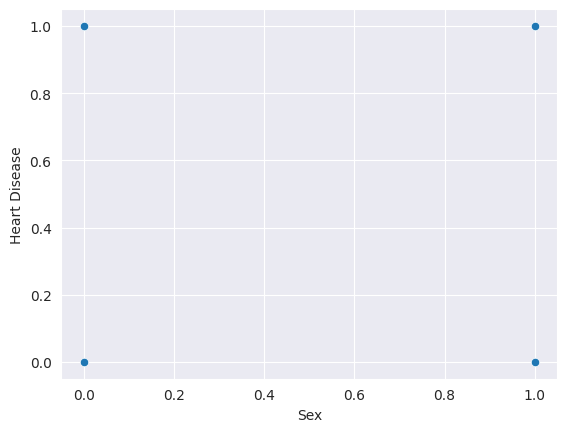

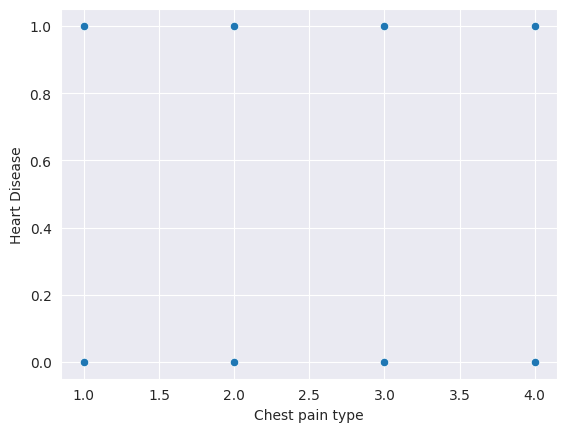

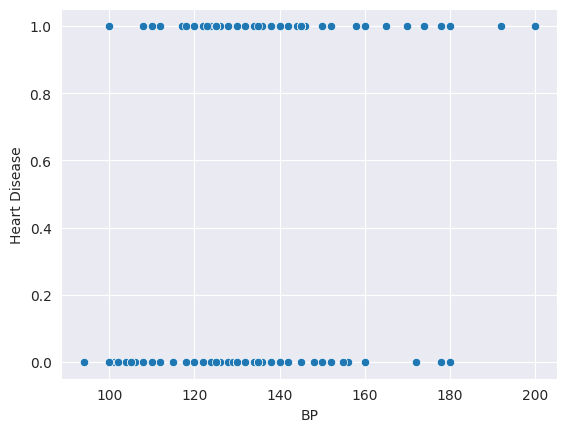

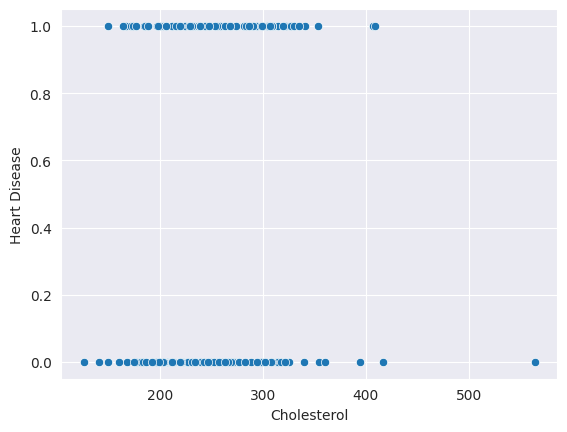

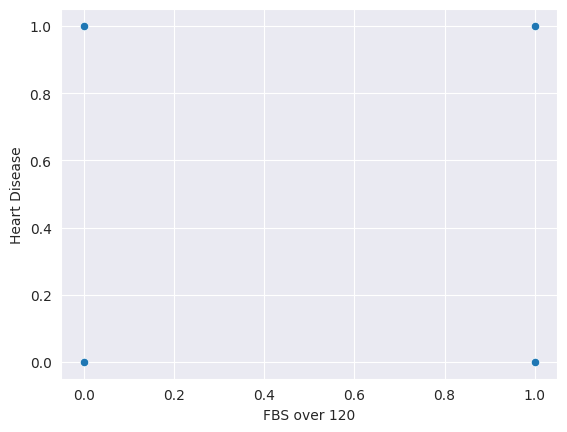

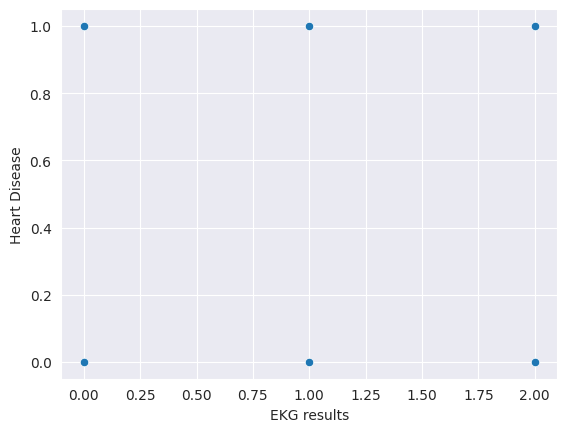

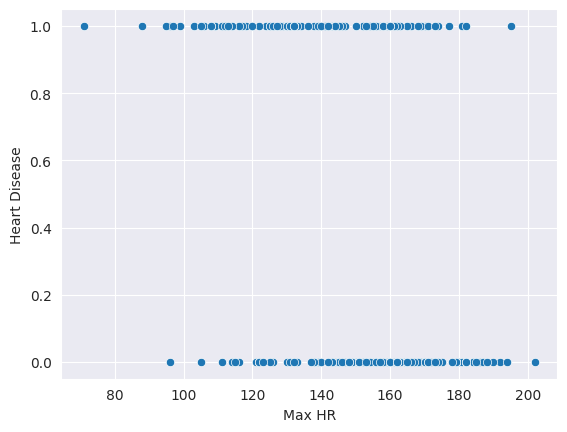

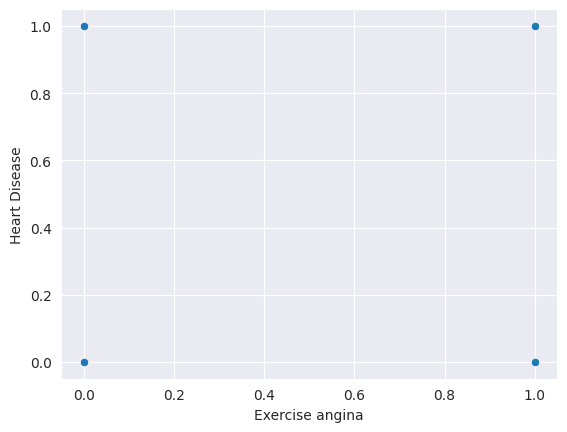

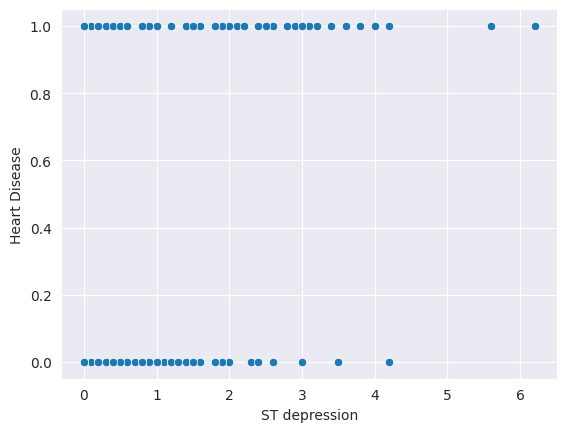

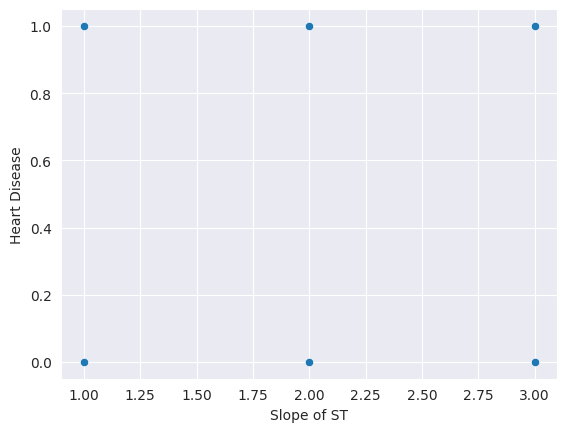

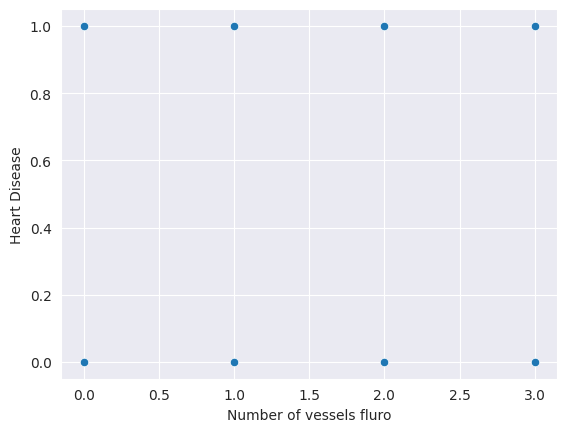

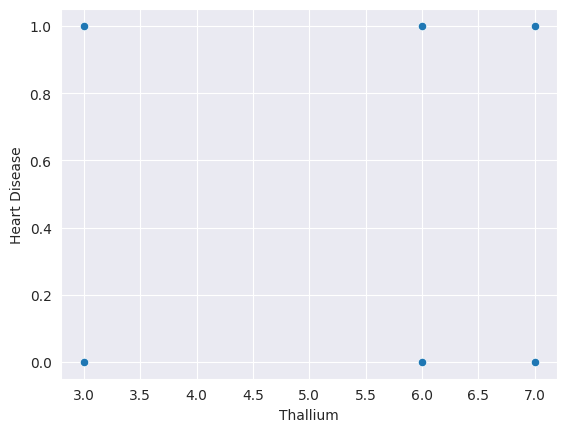

In [ ]:
for i in['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',# check the relationship b/w feature using scatterplot
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium']:
  sns.set_style('darkgrid')
  sns.scatterplot(data=df,x=i,y='Heart Disease')
  plt.show()

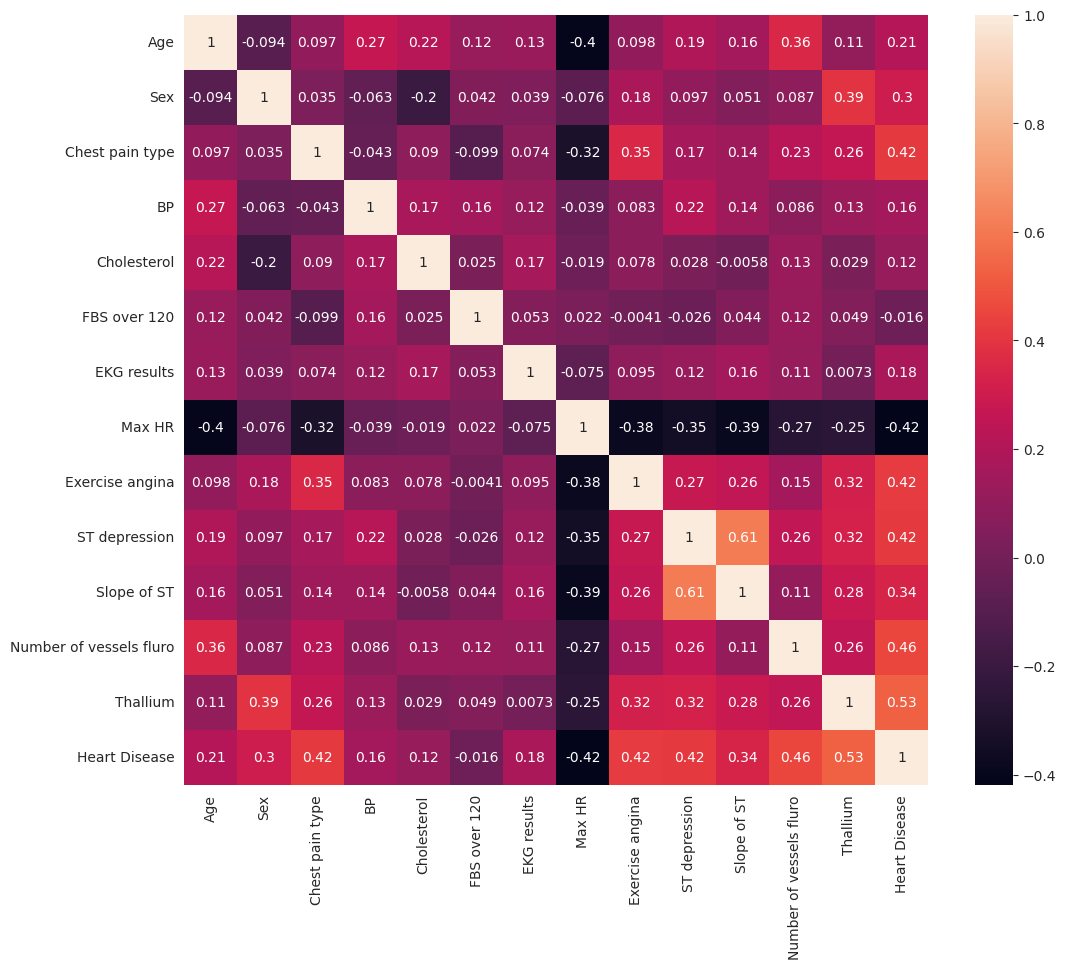

In [ ]:
cor=df.select_dtypes(include='number').corr() # check the corelation and distribution using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True)
plt.show()

# Ourliers detection

<Axes: xlabel='BP', ylabel='Density'>

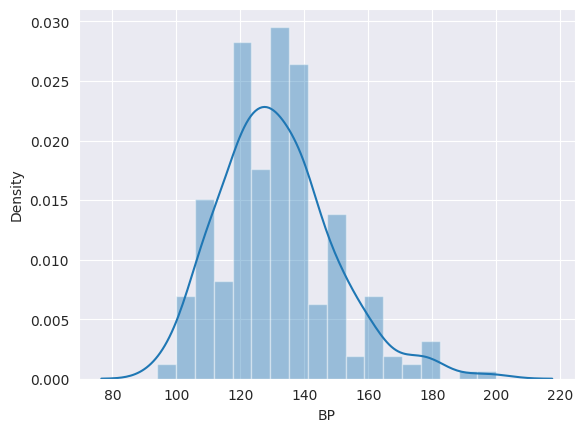

In [ ]:
sns.distplot(df['BP'])

In [ ]:
# the bp columns is close to nornal distribution so we apply Z_sore on BP
upper_limit=df['BP'].mean()+3*df['BP'].std()
lower_limit=df['BP'].mean()-3*df['BP'].std()

In [ ]:
upper_limit,lower_limit

(184.929269322847, 77.75961956604186)

In [ ]:
df.loc[(df['BP']>upper_limit) | (df['BP']<lower_limit)]

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
117,56,0,4,200,288,1,2,133,1,4.0,3,2,7,1
144,54,1,2,192,283,0,2,195,0,0.0,1,1,7,1


In [ ]:
df_new=df.loc[(df['BP']<upper_limit) & (df['BP']>lower_limit)]

In [ ]:
print("old",len(df))
print('new',len(df_new))
print('loss',len(df)-len(df_new))

old 270

new 268

loss 2


<Axes: ylabel='BP'>

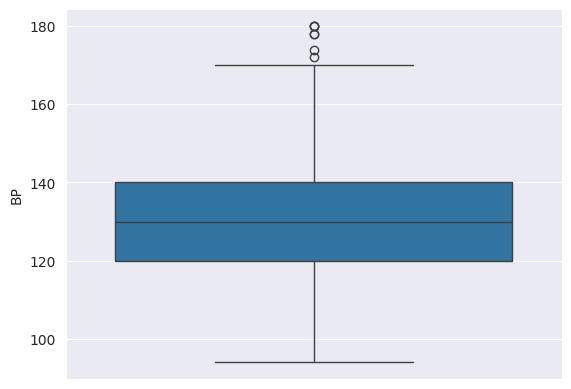

In [ ]:
sns.boxplot(df_new['BP'])

<Axes: xlabel='Cholesterol', ylabel='Density'>

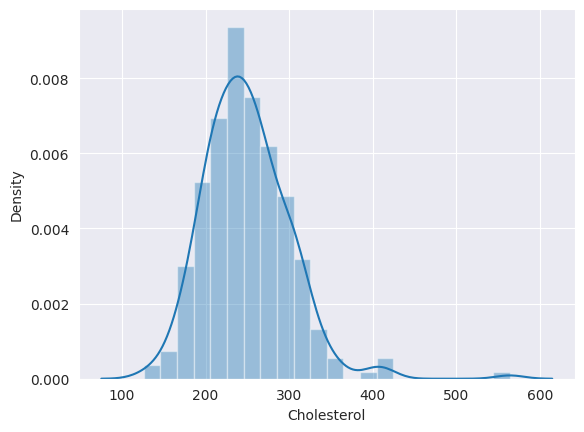

In [ ]:
#working on cholestrol column
sns.distplot(df_new['Cholesterol'])

In [ ]:
q1=df_new['Cholesterol'].quantile(0.25)
q3=df_new['Cholesterol'].quantile(0.75)
iqr=q3-q1

In [ ]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)

In [ ]:
upper_limit,lower_limit

(373.375, 116.375)

In [ ]:
df_new.loc[(df_new['Cholesterol']>upper_limit) | (df_new['Cholesterol']<lower_limit)]

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,1
52,65,0,3,140,417,1,2,157,0,0.8,1,1,3,0
181,56,0,4,134,409,0,2,150,1,1.9,2,2,7,1
188,62,0,4,140,394,0,2,157,0,1.2,2,0,3,0


In [ ]:
df_=df_new.loc[(df_new['Cholesterol']<upper_limit)&(df_new['Cholesterol']>lower_limit)]

In [ ]:
print("old",len(df_new))
print('new',len(df_))
print('loss',len(df_new)-len(df_))

old 268

new 263

loss 5


In [ ]:
df_.head(3)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0


# Spliting Data into traning & testing

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [ ]:
y

,Heart Disease
0,1
1,0
2,1
3,0
4,0
...,...
265,0
266,0
267,0
268,0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(216, 13)

(54, 13)

(216,)

(54,)


# Create pipeline

In [ ]:
scaler=MinMaxScaler()

In [ ]:
log=LogisticRegression()


In [ ]:
pip=make_pipeline(scaler,log)

# Model traning usning logistic_regression

In [ ]:
pip.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

# evaluation

In [ ]:
y_log=pip.predict(X_test)

In [ ]:
y_log

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_score=cross_val_score(pip,X_train,y_train,scoring='accuracy',cv=5) # check the validation of our model

In [ ]:
cross_score

array([0.75      , 0.79069767, 0.88372093, 0.81395349, 0.76744186])

# Accuracy

In [ ]:
accuracy=accuracy_score(y_test,y_log)

In [ ]:
print('accuracy_score of logistic_model',accuracy_score(y_test,y_log))

accuracy_score of logistic_model 0.9259259259259259


# classification report

In [ ]:
#classification report
print(classification_report(y_test,y_log))

              precision    recall  f1-score   support



           0       0.91      0.97      0.94        33

           1       0.95      0.86      0.90        21



    accuracy                           0.93        54

   macro avg       0.93      0.91      0.92        54

weighted avg       0.93      0.93      0.93        54




# confusion matrix

In [ ]:
#confusion matrix
print(confusion_matrix(y_test,y_log))

[[32  1]

 [ 3 18]]


# SVM model

In [ ]:
svm=SVC()

In [ ]:
pip_svm=make_pipeline(scaler,svm)

In [ ]:
pip_svm.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

In [ ]:
y_svm=pip_svm.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_svm))

0.8148148148148148


In [ ]:
#classification report
print(classification_report(y_test,y_svm))

              precision    recall  f1-score   support



           0       0.85      0.85      0.85        33

           1       0.76      0.76      0.76        21



    accuracy                           0.81        54

   macro avg       0.81      0.81      0.81        54

weighted avg       0.81      0.81      0.81        54




In [ ]:
#confusion matrix
print(confusion_matrix(y_test,y_svm))

[[28  5]

 [ 5 16]]


# decision tree model

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
pip_dt=make_pipeline(scaler,dt)

In [ ]:
pip_dt.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
y_dt=pip_dt.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_dt))

0.6666666666666666


# Extra treeClassiffier

In [ ]:
from sklearn.tree import ExtraTreeClassifier

In [ ]:
et=ExtraTreeClassifier()

In [ ]:
pip_et=make_pipeline(scaler,et)

In [ ]:
pip_et.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('extratreeclassifier', ExtraTreeClassifier())])

In [ ]:
y_et=pip_et.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_et))

0.7222222222222222


# Randomforest method

In [ ]:
rf=RandomForestClassifier()

In [ ]:
pip_rf=make_pipeline(scaler,rf)

In [ ]:
pip_rf.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
y_rf=pip_rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_rf))

0.8333333333333334


In [ ]:
print(classification_report(y_test,y_rf))

              precision    recall  f1-score   support



           0       0.85      0.88      0.87        33

           1       0.80      0.76      0.78        21



    accuracy                           0.83        54

   macro avg       0.83      0.82      0.82        54

weighted avg       0.83      0.83      0.83        54




In [ ]:
print(confusion_matrix(y_test,y_rf))

[[29  4]

 [ 5 16]]


# KNNClassifier

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
pip_knn=make_pipeline(scaler,knn)

In [ ]:
pip_knn.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
y_knn=pip_knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_knn))

0.8518518518518519


In [ ]:
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support



           0       0.90      0.85      0.88        33

           1       0.78      0.86      0.82        21



    accuracy                           0.85        54

   macro avg       0.84      0.85      0.85        54

weighted avg       0.86      0.85      0.85        54




In [ ]:
print(confusion_matrix(y_test,y_knn))

[[28  5]

 [ 3 18]]


# Guassian navies bayes

In [ ]:
nb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
pip_nb=make_pipeline(scaler,nb)
pip_mnb=make_pipeline(scaler,mnb)
pip_bnb=make_pipeline(scaler,bnb)

In [ ]:
pip_nb.fit(X_train,y_train)
pip_mnb.fit(X_train,y_train)
pip_bnb.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('bernoullinb', BernoulliNB())])